In [1]:
# 1 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as gl


In [3]:
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
# 2 Read the Dataset:

In [5]:
zomato_data=pd.read_csv("zomato.csv")
zomato_df = zomato_data

zomato_df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [6]:
# 3 Analyze the dataset

In [7]:
zomato_df.shape

(51717, 17)

In [8]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
zomato_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Data Cleaning & Preprocessing

In [11]:
zomato_df=zomato_df.drop(['phone','dish_liked','url'],axis=1)


In [12]:
zomato_df.dropna(how='any',inplace=True)

In [13]:
zomato_df.duplicated().sum()
zomato_df.drop_duplicates(inplace=True)


In [14]:
zomato_df=zomato_df.rename(columns={'approx_cost(for two people)':'cost','listed_in(city)':'city'})


In [16]:
import numpy as np

# Assuming you have already imported pandas as pd and have a DataFrame named zomato_df

# Filter out rows with 'NEW' in the 'rate' column
zomato_df = zomato_df.loc[zomato_df.rate != 'NEW']

# Filter out rows with '-' in the 'rate' column and reset the index
zomato_df = zomato_df.loc[zomato_df.rate != '-'].reset_index(drop=True)

# Define a function to remove '/5' and convert to float
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x

# Apply the remove_slash function, strip whitespace, and convert to float
zomato_df['rate'] = zomato_df['rate'].apply(remove_slash).str.strip().astype('float')


In [17]:
#Changing the cost to string
zomato_df['cost'] = zomato_df['cost'].astype(str)
zomato_df['cost'] = zomato_df['cost'].apply(lambda x:x.replace( ',','.'))
zomato_df['cost']= zomato_df['cost'].astype(float)


In [18]:
# checking for null values after cleaning & data Processing

In [19]:
zomato_df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
reviews_list       0
menu_item          0
listed_in(type)    0
city               0
dtype: int64

# Checking mean rating with restaurant name and rating for each restaurant using below line codes

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already imported pandas as pd and have a DataFrame named zomato_df

# Computing the mean rating for each restaurant
restaurants = list(zomato_df['name'].unique())
zomato_df['Mean Rating'] = 0

for i in range(len(restaurants)):
    mean_rating = zomato_df['rate'][zomato_df['name'] == restaurants[i]].mean()
    zomato_df.loc[zomato_df['name'] == restaurants[i], 'Mean Rating'] = mean_rating

# Scaling the mean rating values
scaler = MinMaxScaler(feature_range=(1, 5))
zomato_df[['Mean Rating']] = scaler.fit_transform(zomato_df[['Mean Rating']]).round(2)


# Checking the mean rating with restaurant name and rating

In [23]:
zomato_df[['name','rate','Mean Rating']].head()

,name,rate,Mean Rating
0,Jalsa,4.1,3.99
1,Spice Elephant,4.1,3.97
2,San Churro Cafe,3.8,3.58
3,Addhuri Udupi Bhojana,3.7,3.45
4,Grand Village,3.8,3.58


# Text Preprocessing and Cleaning

In [24]:
# Lower Casing

zomato_df["reviews_list"]=zomato_df["reviews_list"].str.lower()

# removal of the Punctuations
import string
PUNCT_TO_REMOVE =string.punctuation
def remove_punctuation(text):
  """custom function to remove the punctuation"""
  return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))
zomato_df["reviews_list"]=zomato_df["reviews_list"].apply(lambda text: remove_punctuation(text))


In [25]:
zomato_df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
31798,rated 10 ratedn worst foodvery unhygienicambi...,South Indian
40961,rated 50 ratedn amazing mouth watering place ...,"Chinese, North Indian, Rajasthani, Gujarati, F..."
39463,rated 50 ratedn i have ordered in zomato in c...,North Indian
8890,rated 40 ratedn new udupi grand is a well kno...,"South Indian, North Indian, Chinese, Street Food"
24896,rated 10 ratedn ver bad experience with onlin...,North Indian


# Data Vizualization

Text(0, 0.5, 'Number of outlets')

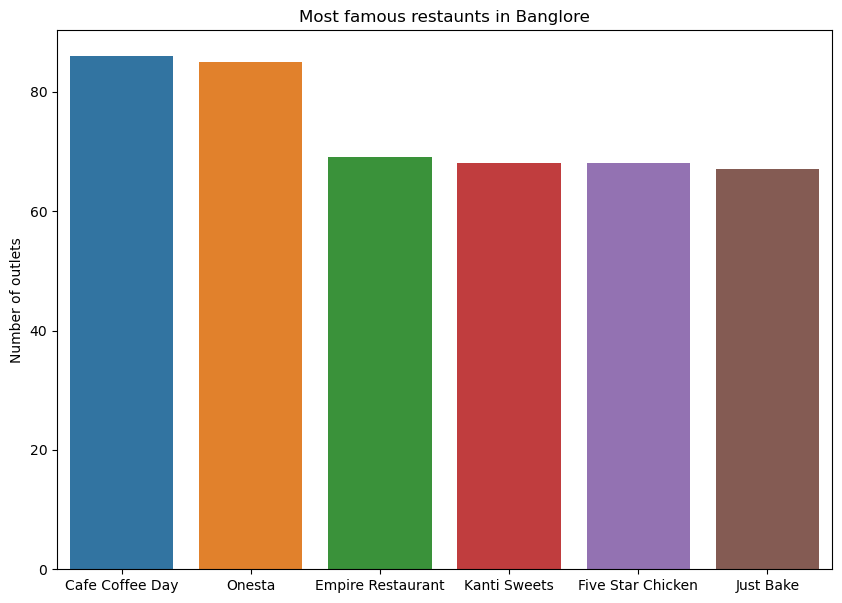

In [26]:
# most famous 6 restaunsts in banglore

plt.figure(figsize=(10,7))
chains=zomato_df['name'].value_counts()[:6]
sns.barplot(x=chains.index,y=chains,palette='tab10')
plt.title("Most famous restaunts in Banglore")
plt.ylabel("Number of outlets")

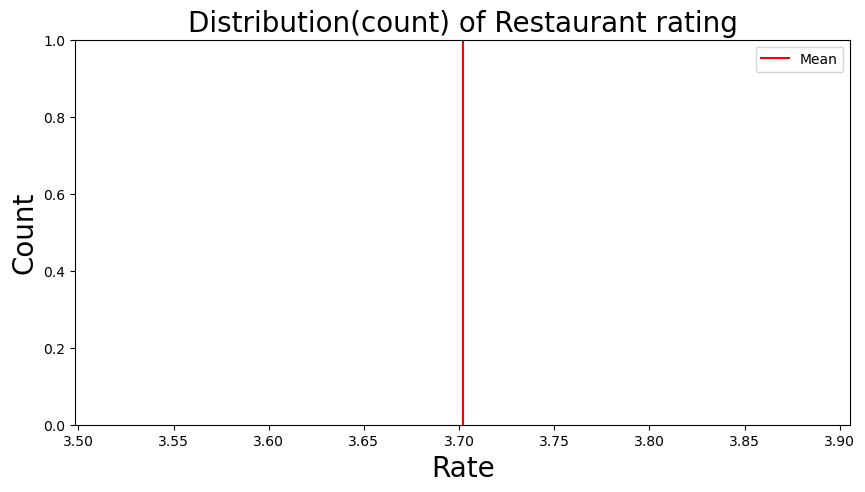

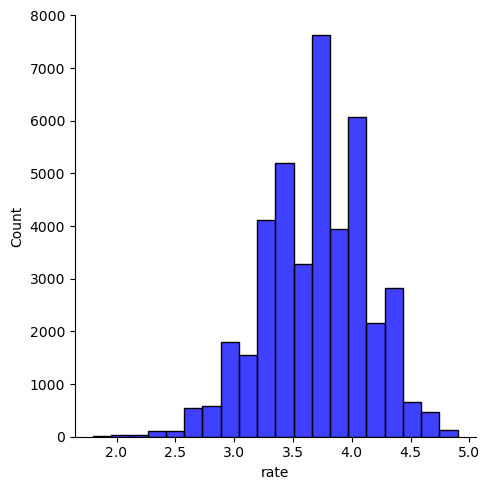

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported matplotlib.pyplot as plt and seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Use displot without specifying ax
sns.displot(zomato_df.rate, kde=False, color='b', bins=20)

# Customize the axes using set methods
ax.axvline(zomato_df.rate.mean(), 0, 1, color='r', label='Mean')
ax.legend()
ax.set_ylabel('Count', size=20)
ax.set_xlabel('Rate', size=20)
ax.set_title('Distribution(count) of Restaurant rating', size=20);

# Show the plot
plt.show()


C:\Users\adity\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\adity\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


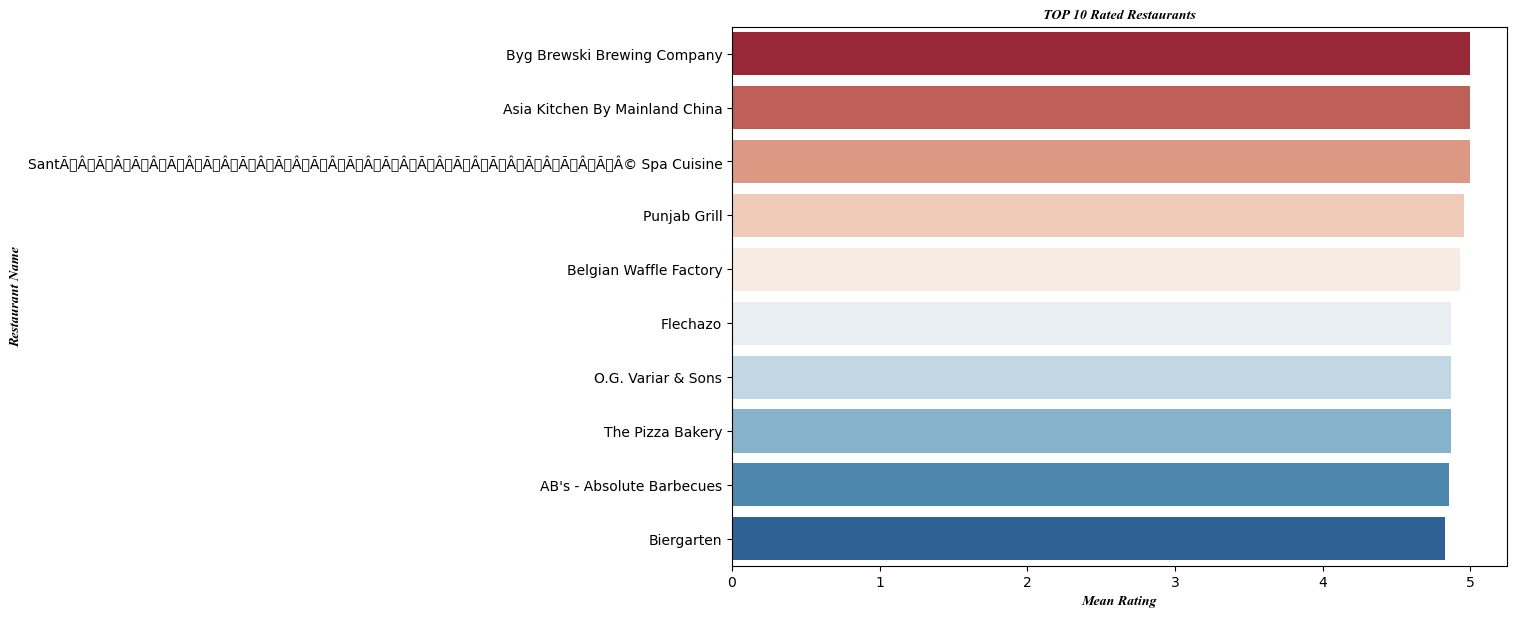

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Assuming df_rating is your dataframe containing the top-rated restaurants

# Drop duplicates based on the 'name' column
df_rating = zomato_df.drop_duplicates(subset='name', keep='first')

# Sort the dataframe by 'Mean Rating' in descending order and take the top 10
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

# Specify a font that supports the required glyphs
font_path = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')[0]
font_prop = font_manager.FontProperties(fname=font_path)

# Plotting the top 10 rated restaurants
plt.figure(figsize=(10, 7))
sns.barplot(data=df_rating, x='Mean Rating', y='name', palette='RdBu')
plt.title('TOP 10 Rated Restaurants', fontproperties=font_prop)
plt.xlabel('Mean Rating', fontproperties=font_prop)
plt.ylabel('Restaurant Name', fontproperties=font_prop)
plt.show()


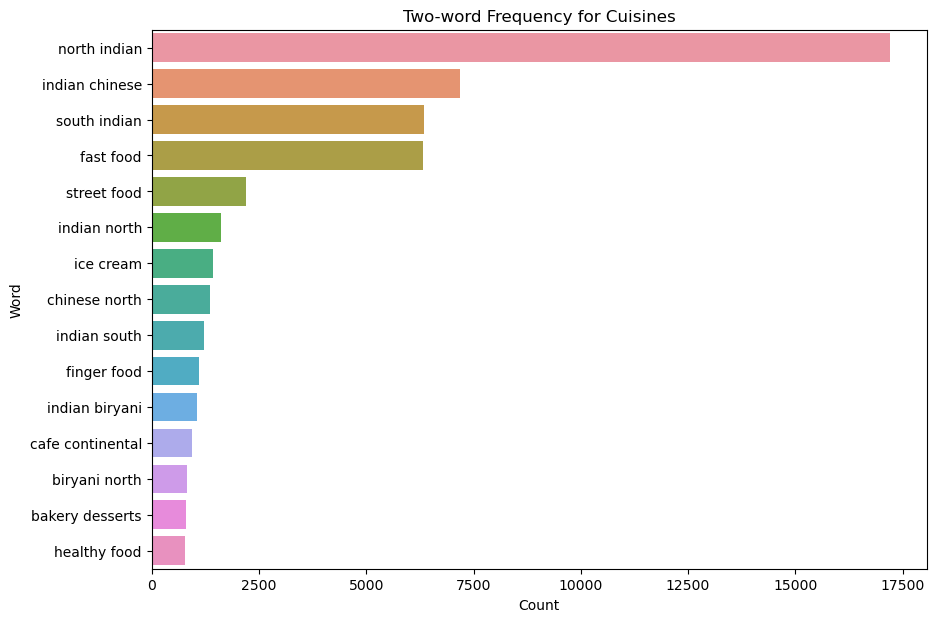

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(column, n, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=None)
    X = vectorizer.fit_transform(column)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_counts))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_freq[:n]

# Assuming that 'zomato_df' is your DataFrame and 'cuisines' is the column of interest
lst = get_top_words(zomato_df['cuisines'], 15, (2, 2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])

plt.figure(figsize=(10, 7))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Two-word Frequency for Cuisines')
plt.show()


# CONTENT-BASE RECOMMENDER SYSTEM

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming df_percent is your DataFrame with a 'reviews_list' column

df_percent = pd.DataFrame(zomato_df)
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Example: Using a random sample of 10% of the data
sampled_data = df_percent.sample(frac=0.1, random_state=42)
tfidf_matrix = tfidf.fit_transform(sampled_data['reviews_list'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)



#  Creating Recommendation system

In [36]:
# Assuming df_percent is your DataFrame
available_restaurants = df_percent.index.unique()

# Print the available restaurants
print("Available Restaurants:")
for restaurant in available_restaurants:
    print(restaurant)


Available Restaurants:
Jalsa
Spice Elephant
San Churro Cafe
Addhuri Udupi Bhojana
Grand Village
Timepass Dinner
Rosewood International Hotel - Bar & Restaurant
Onesta
Penthouse Cafe
Smacznego
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley
Cafe Shuffle
The Coffee Shack
Caf-Eleven
Cafe Vivacity
Catch-up-ino
Kirthi's Biryani
T3H Cafe
360 Atoms Restaurant And Cafe
The Vintage Cafe
Woodee Pizza
Cafe Coffee Day
My Tea House
Hide Out Cafe
CAFE NOVA
Coffee Tindi
Sea Green Cafe
Cuppa
Srinathji's Cafe
Redberrys
Foodiction
Sweet Truth
Ovenstory Pizza
Faasos
Behrouz Biryani
Fast And Fresh
Szechuan Dragon
Empire Restaurant
Maruthi Davangere Benne Dosa
Chaatimes
Havyaka Mess
McDonald's
Domino's Pizza
Hotboxit
Kitchen Garden
Recipe
Beijing Bites
Tasty Bytes
Petoo
Shree Cool Point
Corner House Ice Cream
Biryanis And More
Roving Feast
FreshMenu
Banashankari Donne Biriyani
Wamama
Five Star Chicken
XO Belgian Waffle
Peppy Peppers
Goa 0 Km
Chinese Kitchen
1947
Cake of the Day
Kabab Magic
Namma Brahmin

In [38]:
def recommend(name,cosine_similarities= cosine_similarities):
  # create a list to put top restaurants
  recommend_restaurant=[]

  # find the index of the hotel entered
  idx =indices[indices==name].index[0]

  # find the restaurant with a similar cosine-sin value
  score_series =pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

  top30_indexes=list(score_series.iloc[0:31].index)

  for each in top30_indexes:
    recommend_restaurant.append(list(df_percent.index)[each])

  df_new=pd.DataFrame(columns=['cuisines','Mean Rating','cost'])

  for each in recommend_restaurant:
    df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))

  df_new=df_new.drop_duplicates(subset=['cuisines','Mean Rating','cost'],keep=False)
  df_new=df_new.sort_values(by='Mean Rating', ascending=False).head(10)
  print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS:'%(str(len(df_new)),name))


  return df_new



In [39]:
recommend('Salut')

TOP 10 RESTAURANTS LIKE Salut WITH SIMILAR REVIEWS:


C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipy

,cuisines,Mean Rating,cost
Onesta,"Pizza, Cafe, Italian",4.37,600.0
Sattvam,"North Indian, South Indian",4.25,1.2
Salut,"Continental, Finger Food, Seafood, Pizza",3.97,1.2
SLV Corner Restaurant,"South Indian, Chinese, North Indian, Street Fo...",3.97,550.0
Dadi's Dum Biryani,"Biryani, North Indian, Mughlai",3.94,800.0
Starbucks,"Cafe, Desserts",3.84,700.0
The Lassi Park,"Juices, Desserts",3.73,200.0
CakeZone,"Bakery, Desserts",3.72,500.0
Cake Town Cafe,"Bakery, Desserts",3.71,500.0
Kanti Sweets,"Mithai, Street Food",3.71,400.0


In [40]:
recommend('Onesta')

TOP 10 RESTAURANTS LIKE Onesta WITH SIMILAR REVIEWS:


C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipy

,cuisines,Mean Rating,cost
Onesta,"Pizza, Cafe, Italian",4.37,600.0
Ayodhya Upachar,"South Indian, North Indian, Chinese, Street Food",4.23,200.0
The Coffee Shack,"Cafe, Chinese, Continental, Italian",4.10,500.0
Upahara Darshini,"South Indian, North Indian, Chinese",3.81,400.0
Faasos,"North Indian, Biryani, Fast Food",3.75,500.0
The Lassi Park,"Juices, Desserts",3.73,200.0
CakeZone,"Bakery, Desserts",3.72,500.0
Cake Town Cafe,"Bakery, Desserts",3.71,500.0
Matru Sagar,"South Indian, North Indian, Chinese",3.59,250.0
Cafe Monarch Luxur,"North Indian, South Indian, Chinese, Fast Food",3.58,800.0


In [43]:
recommend('Desi Swaad')

TOP 10 RESTAURANTS LIKE Desi Swaad WITH SIMILAR REVIEWS:


C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\3033630431.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new =df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating','cost']][df_percent.index == each].sample()))
C:\Users\adity\AppData\Local\Temp\ipy

,cuisines,Mean Rating,cost
Halli Jonne Biriyani,"Biryani, Kebab",4.10,400.0
Ruh,"North Indian, Mughlai, Mediterranean, Iranian",3.91,1.0
Upahara Darshini,"North Indian, Chinese, South Indian, Fast Food",3.81,600.0
Mad Over Donuts,"Bakery, Desserts, Beverages",3.75,450.0
CakeZone,"Bakery, Desserts",3.72,200.0
Waffle-A-Go Go,"Fast Food, Desserts, Ice Cream",3.71,400.0
Grazers,"Cafe, Burger, Continental, Italian, Desserts",3.71,650.0
Chai Point,"Tea, Beverages, Fast Food",3.65,250.0
Burger King,"Burger, Fast Food, Beverages",3.64,600.0
Mandya Gowdru Donne Biriyani,"Biryani, South Indian",3.60,350.0
